<a href="https://colab.research.google.com/github/jorge-puentes-b/RegrecionLogis/blob/main/TP1/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel ("/content/drive/MyDrive/Diabetes.xlsx")
df.head(2)
df.info(2)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            2000 non-null   int64
 1   BMI            2000 non-null   int64
 2   BloodPressure  2000 non-null   int64
 3   Glucose        2000 non-null   int64
 4   Insulin        2000 non-null   int64
 5   Outcome        2000 non-null   int64
dtypes: int64(6)
memory usage: 93.9 KB


,Age,BMI,BloodPressure,Glucose,Insulin,Outcome
count,2000.000000,2.000000e+03,2000.000000,2000.000000,2.000000e+03,2000.000000
mean,49.114000,1.478758e+16,99.765500,135.321000,1.284385e+16,0.512000
std,17.926564,1.232867e+16,22.853307,37.509725,1.069124e+16,0.499981
min,18.000000,2.158289e+12,60.000000,70.000000,2.704332e+12,0.000000
25%,34.000000,3.155935e+15,80.000000,102.000000,2.891772e+15,0.000000
50%,49.000000,1.581819e+16,100.000000,137.000000,1.125083e+16,1.000000
75%,65.000000,2.589805e+16,119.000000,168.000000,1.956500e+16,1.000000
max,79.000000,3.998860e+16,139.000000,199.000000,6.393735e+16,1.000000


In [ ]:
X1 = 'Age'
X2 = 'Glucose'
X3 = 'BloodPressure'
X4 = 'BMI'
X5 = 'Insulin
Y  = 'Outcome'

Exactitud del modelo: 49.33%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39       300
           1       0.50      0.66      0.57       300

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.49      0.48       600



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


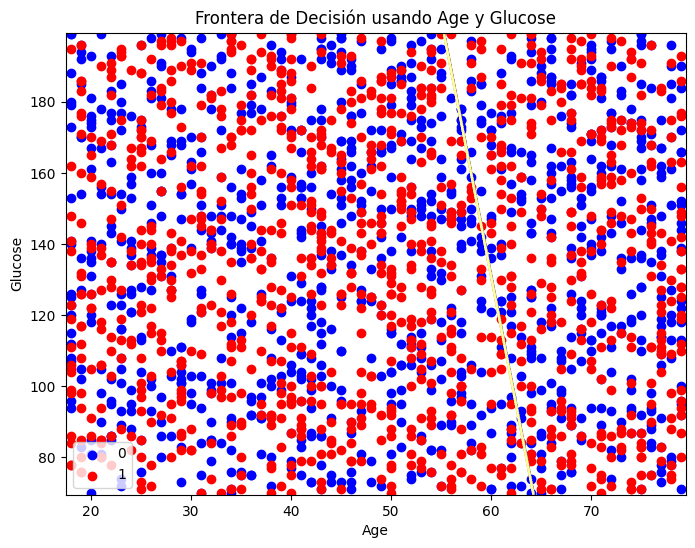

In [ ]:
X1 = 'Age'
X2 = 'Glucose'
Y  = 'Outcome'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
df = pd.read_excel("/content/drive/MyDrive/Diabetes.xlsx")

# Definir X con las características Age y Glucose y y con la variable objetivo
X = df[[X1, X2]]  # Usamos solo Age y Glucose para el modelo
y = df[Y]  # Variable objetivo Outcome

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística con Age y Glucose
model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo: exactitud
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Exactitud del modelo: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Crear una malla para la visualización (solo usando Age y Glucose para graficar)
x_min, x_max = X[X1].min() - 0.5, X[X1].max() + 0.5
y_min, y_max = X[X2].min() - 0.5, X[X2].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predicción para todos los puntos en la malla
Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Gráfico de dispersión de los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[X1][y == 0], X[X2][y == 0], color='blue', label='0')
plt.scatter(X[X1][y == 1], X[X2][y == 1], color='red', label='1')

# Dibuja la frontera de decisión
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

# Etiquetas y leyenda
plt.xlabel(X1)
plt.ylabel(X2)
plt.legend()
plt.title('Frontera de Decisión usando Age y Glucose')
plt.show()


Exactitud del modelo: 49.33%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39       300
           1       0.50      0.66      0.57       300

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.49      0.48       600



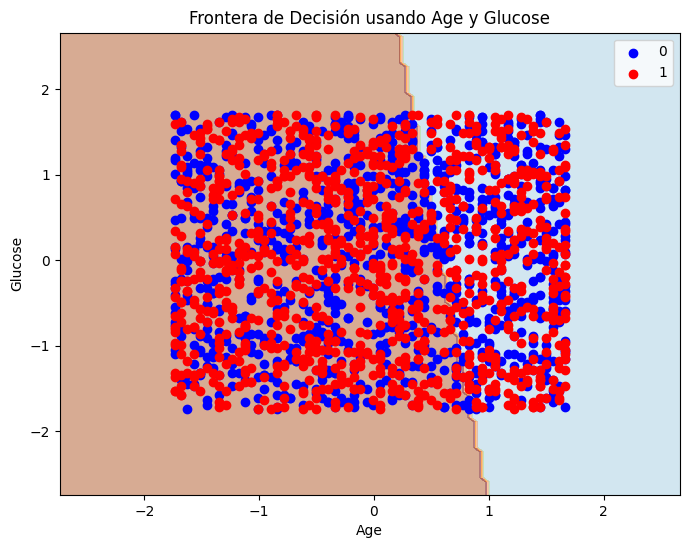

In [ ]:
# Crear el escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos y transforma tanto el conjunto de entrenamiento como el conjunto de prueba
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

# Crear una instancia de LogisticRegression y ajustarla a tus datos de entrenamiento
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Ahora puedes predecir los valores para tus datos de prueba
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Exactitud del modelo: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# Crear una malla para evaluar el modelo
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
h = 0.05  # El paso de la malla

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predice en todos los puntos de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Crea el gráfico de dispersión de los datos
plt.figure(figsize=(8, 6))

# Dibujar la frontera de decisión con colores de fondo
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)

# Gráfico de los puntos de datos
plt.scatter(X_scaled[y == 0, 0], X_scaled[y == 0, 1], color='blue', label='0')
plt.scatter(X_scaled[y == 1, 0], X_scaled[y == 1, 1], color='red', label='1')

# Etiquetas y leyenda
plt.xlabel(X1)
plt.ylabel(X2)
plt.legend()
plt.title('Frontera de Decisión usando Age y Glucose')
plt.show()

In [ ]:
# X1 = 'Age'
# X2 = 'Glucose'
# X3 = 'BloodPressure'
# X4 = 'Insulin'
# X5 = 'BMI'
# Y  = 'Outcome'

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# # Cargar datos
# df = pd.read_excel("/content/drive/MyDrive/Diabetes.xlsx")

# # Definir X con las características y y con la variable objetivo
# X = df[[X1, X2, X3, X4, X5]]  # Todas las características
# y = df[Y]  # Variable objetivo Outcome

# # Dividir los datos en conjunto de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# # Escalar los datos para mejorar el rendimiento del modelo
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Entrenar el modelo de regresión logística
# model = LogisticRegression(solver='liblinear')
# model.fit(X_train_scaled, y_train)

# # Predicción en el conjunto de prueba
# y_pred = model.predict(X_test_scaled)

# # Evaluación del modelo: exactitud
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# print("Exactitud del modelo: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
# print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

# # Crear una malla para la visualización (solo usando Age y Glucose para graficar)
# X_plot = df[[X1, X2]]  # Solo usamos Age y Glucose para el gráfico
# x_min, x_max = X_plot[X1].min() - 0.5, X_plot[X1].max() + 0.5
# y_min, y_max = X_plot[X2].min() - 0.5, X_plot[X2].max() + 0.5
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
#                      np.arange(y_min, y_max, 0.05))

# # Predicción para todos los puntos en la malla
# Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
# Z = Z.reshape(xx.shape)

# # Gráfico de dispersión de los datos
# plt.figure(figsize=(8, 6))
# plt.scatter(X_plot[X1][y == 0], X_plot[X2][y == 0], color='blue', label='0')
# plt.scatter(X_plot[X1][y == 1], X_plot[X2][y == 1], color='red', label='1')

# # Dibuja la frontera de decisión
# plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

# # Etiquetas y leyenda
# plt.xlabel(X1)
# plt.ylabel(X2)
# plt.legend()
# plt.title('Frontera de Decisión usando Age y Glucose')
# plt.show()

Exactitud del modelo: 48.00%
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.47      0.33      0.39       300
           1       0.48      0.63      0.55       300

    accuracy                           0.48       600
   macro avg       0.48      0.48      0.47       600
weighted avg       0.48      0.48      0.47       600



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but StandardScaler is expecting 5 features as input.